In [1]:
import pickle
with open('ROMS_26yr_daydic.pkl', 'rb') as file:
    daydic = pickle.load(file)

with open('ROMS_26yr_eddies.pkl', 'rb') as file:
    eddies = pickle.load(file)

In [2]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import math
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

fname = '/srv/scratch/z3533156/26year_BRAN2020/outer_avg_01461.nc'
dataset = nc.Dataset(fname)
lon_rho  = dataset.variables['lon_rho']
lon_rho = np.transpose(lon_rho, axes=(1, 0))
lat_rho  = dataset.variables['lat_rho']
lat_rho = np.transpose(lat_rho, axes=(1, 0))
z_r = np.load('/home/z5297792/MRes/z_r.npy')
z_r = np.transpose(z_r, (1, 2, 0))
h = dataset.variables['h']
h = np.transpose(h, (1, 0))
previous_file_idx = -1
TOTAL_NUM_DAYS = len(daydic)

In [7]:
max_age = 0
for e in eddies:
    if eddies[e].iloc[0]['Age'] > max_age:
        oldest_eddy = e
        max_age = eddies[e].iloc[0]['Age']

print(max_age)
print(oldest_eddy)

482.0
Eddy790


In [21]:
old_eddies = []
for e in eddies:
    if eddies[e].iloc[0]['Age'] > 100:
        old_eddies.append(e)


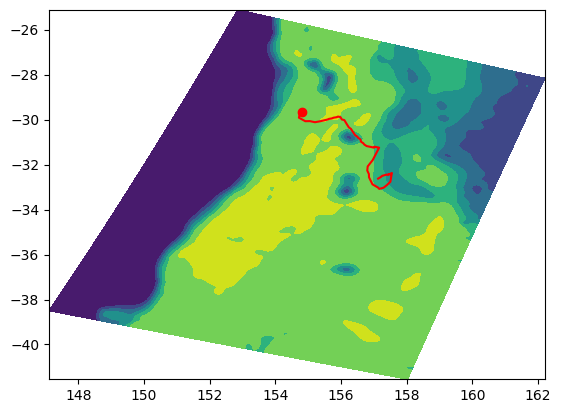

In [10]:
import matplotlib.pyplot as plt

# e_num = 2

# edata = eddies[old_eddies[e_num]]
edata = eddies['Eddy19']

# print(old_eddies[e_num])

plt.contourf(lon_rho,lat_rho,h)
plt.plot(edata.Lon, edata.Lat, color='red')
plt.scatter(edata.Lon.iloc[-1], edata.Lat.iloc[-1], color='red')